# Теория вероятностей и математическая статистика

## Урок 1

## Случайные события. Вероятность события. Условная вероятность. Формула Байеса

### Случайные события

__Случайное событие__ — любой исход опыта, который может произойти или не произойти.

Например,
1. При броске двух игральных костей на одной выпало число $1$, а на другой — $2$.
2. Клиент банка не вернул кредит.
3. Температура воздуха в Москве за последние десять дней не превышала $29$ градусов по Цельсию.

Пусть $A$ и $B$ — случайные события.
* __Сумма__ событий $A + B$ соответствует наступлению хотя бы одного из событий $A$ и $B$. Такое событие иногда называют __объединением__.
* __Произведение__ $A \cdot B$ соответствует наступлению событий $A$ и $B$ одновременно. Такое событие ещё называется __совместным__ (что, вообще, не во всех случаях корректно), потому что мы можем предположить возможность наступления события A и B одновременно, но одновременно они никогда не случаться, например, одновременно на 1 кубике не может выпасть 2 и 5. Это два события, которые мы хотим, что-бы они наступили одновременно, поэтому это произведение, однако эти события несовместны и никогда одновременно не наступят.
* __Отрицание__ $\overline{A}$ соответствует тому, что событие $A$ не наступило. Такое событие также называется __дополнением__.

Событие называется __достоверным__, если в результате испытания оно обязательно произойдёт. 

Например,
1. На игральной кости выпало число, не превышающее $6$.
2. Подбросили монету, и выпал либо орёл, либо решка.
3. Монету подбросили стократно, и решка выпала не более $100$ раз.

Наоборот, __невозможным событием__ мы называем событие, которое никогда не произойдёт.

Например,
1. Две игральные кости бросили один раз, и сумма выпавших чисел составила $15$.
2. Монету подбросили стократно, и решка выпала $55$ раз, а орёл — $56$.

__Совместными__ называются события, которые могут произойти вместе. Соответственно, __несовместными__ называются события, которые вместе случиться не могут.

Например,
* При броске монеты не могут одновременно выпасть орёл и решка.
* При броске дротика в круглую мишень можно попасть одновременно в правую половину мишени и в нижнюю половину.

### Статистическая вероятность

__Относительная частота__ случайного события — это отношение количества испытаний, в которых данное событие состоялось, к общему числу испытаний:
$$W(A) = \frac{m}{n},$$
где
* $m$ — число испытаний, в результате которых произошло событие $A$,
* $n$ — общее число испытаний.

__Пример 1__

Смоделируем $60$-кратное подбрасывание игральной кости с помощью функции `randint` из модуля `numpy.random`.

In [1]:
import numpy as np

In [13]:
n = 60

b = np.random.randint(1, 7, size=n)

print(b)

[1 1 4 6 4 6 5 3 6 1 1 4 5 5 5 6 3 5 4 1 5 4 3 6 4 2 6 3 5 1 5 3 3 5 1 5 5
 4 3 3 3 5 1 2 1 3 2 4 3 6 2 3 6 3 3 3 4 1 5 4]


Событием $A$ будем считать выпадение числа $3$. Сперва найдём его относительную частоту. Вычислим мощность подмножества, где наблюдалось событие $A$, т.е. выпадало число $3$:

In [27]:
b == 3

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True, False, False,  True, False, False,  True, False,  True,
        True,  True, False, False, False, False])

In [28]:
m = (b == 3).sum()

m

15

Итак, относительная частота события $A$:

In [29]:
W = m / n

print(W)

1.5e-06


_Замечание_: здравый смысл подсказывает, что вероятность такого события равна $1 / 6$:

In [30]:
1 / 6

0.16666666666666666

__Пример 2__

Разберём более сложный пример. Смоделируем ситуацию, когда бросают две игральные кости одновременно.

При этом будем находить частоту случайного события $B$, при котором на первой кости выпало $1$, а на второй — $2$. 

Проведём для этого $360$ испытаний.

In [31]:
n = 360

c = np.random.randint(1, 7, size=n)
d = np.random.randint(1, 7, size=n)

Числа, стоящие на одной позиции в массивах `c` и `d`, будем считать результатами одного эксперимента.

Например, в первом испытании на первой игральной кости выпало число `c[0]`, а на второй — `d[0]`.

In [32]:
i = 3

print(c[i], d[i])

2 6


Посчитаем число случав, когда в одном испытании на первой игральной кости выпало число $1$, а на второй — $2$.

In [33]:
m = ((c == 1) & (d == 2)).sum()

print(m)

5


Вычислим относительную частоту события $B$:

In [34]:
W = m / n

print(W)

0.013888888888888888


Аналогично, вероятность такого события:

In [35]:
1 / 36

0.027777777777777776

Как правило, чем больше испытаний мы делаем, тем больше значение частоты «стабилизируется», т.е. приближается к какому-то конкретному значению.

__Пример 3__

Вернёмся к примеру 1 (бросок одного кубика) и посчитаем его относительную частоту при различных значениях $n$.

In [36]:
def dice_frequency(n: int) -> float:
    """Относительная частота выпадения значения 3 при броске одного кубика.
    
    :param n: число испытаний
    """

    b = np.random.randint(1, 7, size=n)
    
    m = (b == 3).sum()
    
    return m / n

In [37]:
from matplotlib import pyplot as plt
from tqdm import trange

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

100%|██████████| 50/50 [00:06<00:00,  7.72it/s]


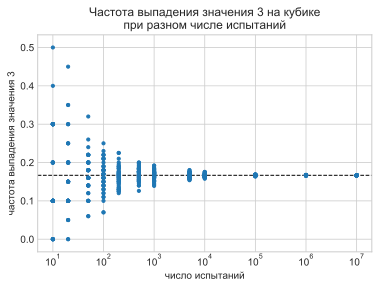

In [38]:
ns = [10, 20, 50, 100, 200, 500, 1000, 5000, 10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7]

x = []
y = []

for _ in trange(50):
    for n in ns:
        x.append(n)
        y.append(dice_frequency(n))

plt.scatter(x, y, s=10)
    
plt.axhline(y=1 / 6, c='black', ls='dashed', lw=1).set_zorder(0)
    
plt.xscale('log')

plt.title('Частота выпадения значения 3 на кубике\nпри разном числе испытаний')
plt.xlabel('число испытаний')
plt.ylabel('частота выпадения значения 3')

plt.show()

__Статистической вероятностью__ события $A$ называется его относительная частота при достаточно большом («бесконечном») количестве опытов. Вероятность события $A$ обозначается $P(A)$.

Например, при многократном повторении бросков монеты относительная частота выпадения орла может различаться, однако, вероятность выпадения орла равна $0.5$.

Свойства вероятности:

* $0 \leq P(A) \leq 1$ для любого события $A$.
* $P(\varnothing) = 0$, $P(\Omega) = 1$, где $\varnothing$ — невозможное событие, $\Omega$ — достоверное событие.
* $P(A + B) = P(A) + P(B) - P(AB)$, где $A + B$ — объединение событий (происходит хотя бы одно), а $AB$ — совместное событие (происходят оба).
* В частности, __для несовместных событий__ $P(A + B) = P(A) + P(B)$.
* $P(A) + P \left( \overline{A} \right) = 1$ для любого события $A$.

_Замечание_. Ещё раз подчеркнём, что __вероятности произвольных событий суммировать нельзя__, сперва необходимо установить несовместность событий.

### Комбинаторика

__Комбинаторика__ — раздел математики, в котором изучаются задачи выбора элементов из заданного множества и расположения их в группы по заданным правилам.

Мы изучим:
1. размещения,
2. перестановки,
3. сочетания.

__Размещение из $n$ элементов по $k$ элементов__ — это упорядоченный набор из $k$ элементов, выбранных из множества, содержащего $n$ элементов.

_Замечание_: здесь $k$ и $n$ — натуральные числа и $0 \leq k \leq n$.

Например, набор $(1, 3, 5)$ является размещением из множества $\{ 1, 2, 3, 4, 5 \}$.

В размещениях важен порядок. Так, $(1, 3, 5)$ и $(5, 1, 3)$ — разные размещения.

_Договорённость_: будем обозначать _круглыми_ скобками _упорядоченные_ наборы, а _фигурными_ — _неупорядоченные_.

Посчитаем количество размещений из $n$ по $k$. Представим себе $k$ пустых ячеек. В первой ячейке может быть любой из $n$ элементов. Во второй ячейке может быть что угодно кроме элемента из первой ячейки, т.е. всего $n - 1$ элементов. В третьей ячейке, аналогично, может быть любой из $n - 2$ элементов, и т.д.

Теперь чтобы получить число всевозможных размещений, нужно перемножить все эти числа. Итак, __количество размещений из $n$ по $k$__:
$$A_n^k = n \cdot (n - 1) \cdot (n - 2) \cdots (n - k + 1) = \dfrac{n!}{(n - k)!},$$
где $n! = n \cdot (n - 1) \cdot (n - 2) \cdots 2 \cdot 1$ — факториал.

In [39]:
def arrangements(n: int, k: int) -> int:
    """Число размещений.
    """
    
    return np.math.factorial(n) // np.math.factorial(n - k)

__Перестановкой из $n$ элементов__ называется размещение из $n$ элементов по $n$ элементов.

Чтобы посчитать количество перестановок, достаточно знать, что $0! = 1$. Итак, __количество перестановок из $n$ элементов__:
$$P_n = \dfrac{n!}{0!} =  n!$$

In [40]:
def permutations(n: int) -> int:
    """Число перестановок.
    """
    
    return np.math.factorial(n)

__Сочетание из $n$ элементов по $k$ элементов__ — это __не__ упорядоченный набор из $k$ элементов, выбранных из множества, содержащего $n$ элементов.

Например, набор $\{ 1, 3, 5 \}$ является размещением из множества $\{ 1, 2, 3, 4, 5 \}$. При этом, $\{ 1, 3, 5 \}$ и $\{ 5, 1, 3 \}$ — одно и то же сочетание.

Сочетаний из $n$ по $k$ меньше, чем размещений. Насколько меньше? Из каждого сочетания размера $k$ можно получить ровно $k!$ различных размещений (переставляя элементы из сочетания всевозможными способами). Итак, __число сочетаний из $n$ по $k$__:
$$C_n^k = \dfrac{A_n^k}{P_k} =  \dfrac{n!}{k! (n - k)!}$$

__Пример 4__

Сколькими способами можно выбрать из колоды, состоящей из $36$ карт, $4$ карты?

Поскольку здесь важен не порядок, а лишь содержание, воспользуемся формулой сочетаний:
$$C_{36}^4 = \frac{36!}{4! \: (36 - 4)!} = \frac{36!}{4! \: 32!} = \frac{33 \cdot 34 \cdot 35 \cdot 36}{4!} = \frac{33 \cdot 34 \cdot 35 \cdot 36}{2 \cdot 3 \cdot 4} = 58905$$

In [42]:
combinations(36, 4)

58905

__Пример 5__

В магазине $20$ покупателей. Сколькими способами они могут образовать очередь из $5$ человек?

В этом примере важен порядок, в котором покупатели будут стоять в очереди, поэтому применим формулу размещений:

In [43]:
arrangements(20, 5)

1860480

__Пример 6__

Сколькими способами $5$ покупателей могут образовать очередь?

Этот пример похож на предыдущий, но есть важное отличие: не нужно выбирать $5$ покупателей из $20$. Здесь их всего $5$, и все должны присутствовать в очереди, поэтому нам нужно число перестановок:

In [44]:
permutations(5)

120

In [45]:
arrangements(5, 5)

120

__Пример 7__

Сколькими способами можно из колоды, состоящей из $36$ карт, выбрать $5$ так, чтобы среди них оказалось $2$ туза?

Для решения разделим мысленно колоду на две части: в первой будут лежать только тузы ($4$ штуки), а во второй — всё кроме этих тузов ($32$ штуки). Если в «руке» $5$ карт, среди которых $2$ туза, то такую руку можно получить, вытащив $2$ карты из части с тузами и $3$ карты из части с остальными картами.

Итак, если мы хотим перебрать все такие «руки», то достаточно найти число способов вытащить $2$ туза из $4$, $3$ не-туза из $32$, а затем перемножить результаты:
$$a = C_4^2 \cdot C_{32}^3 = 29760$$

In [47]:
a = combinations(4, 2) * combinations(32, 3)
a

29760

__Пример 8__

Сколькими способами можно из колоды, состоящей из $36$ карт, выбрать $5$ так, чтобы среди них оказалось от $2$ до $3$ тузов?

В чём отличие этой задачи от предыдущей? В предыдущей считались только наборы из $5$ карт с двумя тузами. Здесь же тузов может быть как $2$, так и $3$.

Удобнее всего эту задачу решать по частям. Мы уже нашли число $a$ способов достать $5$ карт, среди которых ровно $2$ туза. Найдём аналогичным образом число $b$ способов достать $5$ карт, среди которых ровно $3$ туза.

In [48]:
b = combinations(4, 3) * combinations(32, 2)
b

1984

Наконец, отметим, что в первом списке комбинаций карт ($2$ туза) и втором списке ($3$ туза) нет одинаковых комбинаций, поскольку в одной «руке» не может быть одновременно и ровно $2$, и ровно $3$ туза. Это означает, что для получения ответа числа $a$ и $b$ достаточно сложить:

In [49]:
a + b

31744

### Классическое определение вероятности

Итак, зачем всё это нужно?

Сформулируем __классическое определение вероятности__. Предположим, проводится опыт с $n$ возможными исходами, причём все эти исходы равновозможны и несовместны. Такие исходы называются __элементарными событиями__.

Например, 
* Игральный кубик бросается однажды. Его выпадение каждой из $6$ сторон — все элементарные события.
* Кубик бросается дважды. Элементарные события — все пары его значений.

Рассмотрим событие $A$, которое можно «собрать» из элементарных событий (т.е. указать, какие элементарные события повлекут за собой событие $A$, а какие — нет).

Например, выпадение кубика стороной, значение которой не превышает $3$, включает в себя три элементарных события: $1$, $2$ и $3$.

__Вероятность__ события $A$:
$$P(A) = \dfrac{m}{n}$$

Здесь $n$ — общее число исходов, а $m$ — число исходов, которые влекут за собой событие $A$.

__Пример 9__

Вычислим вероятность того, что на игральной кости выпадет число $3$. Известно, что у кости шесть граней с числами от $1$ до $6$ и каждая может выпасть с равной вероятностью. По классической формуле вероятности получаем результат:
$$P(A) = \frac{m}{n} = \frac{1}{6}$$

__Пример 10__

Бросаются одновременно три игральных кубика. Какова вероятность того, что все три значения будут одинаковыми?

Всего есть $6 \cdot 6 \cdot 6$ исходов, поскольку каждый из кубиков может выпасть любой из $6$ сторон. Нас интересуют исходы, при которых все три значения совпали. Таких событий $6$. Итак,
$$P(A) = \dfrac{6}{6^3} = \dfrac{1}{36}$$

### Условная вероятность. Независимые события

Наступление одного события может влиять на наступление другого. Например, вероятность того, что за день хоть раз выпадет снег, выше зимой.

__Условная вероятность__ $P(A|B)$ — это вероятность наступления события $A$ при условии, что произошло событие $B$.
$$P(A | B) = \dfrac{P(AB)}{P(B)}$$

_Замечание_. Такое определение интуитивно напоминает классическое определение вероятности, данное выше: «доля» вероятности совместного события $AB$ относительно вероятности события $B$.

События $A$ и $B$ называются __независимыми__, если $P(A|B) = P(A)$, т.е. если наступление события $B$ не влияет на вероятность события $A$, и наоборот. Например, при многократном броске кубика результаты одного броска никак не влияют на результаты других бросков. Напротив, события «зима» и «снег» из примера выше, являются зависимыми.

_Замечание_. Зависимость событий не означает, что одно гарантированно влечёт другое. Она лишь означает, что наступление одного __меняет вероятность__ наступления другого.

__Для независимых событий__:
$$P(AB) = P(A) \cdot P(B)$$

_Замечание_. Аналогично суммированию, __вероятности произвольных событий перемножать нельзя__, сперва необходимо установить независимость событий.

__Пример 11__

Наугад выбирается точка с круглой мишени. Пусть событие $A$ заключается в выборе точки из правой половины, а событие $B$ — выбор точки из нижней половины. Являются ли эти события зависимыми?

Считаем, что $P(A) = P(B) = 1/2$. Посчитаем совместную вероятность $P(AB)$. Событие $AB$ соответствует выбору точки из правой нижней четверти, т.е. $P(AB) = 1/4$. Следовательно, 
$$P(A|B) = \dfrac{P(AB)}{P(B)} = \dfrac{\frac{1}{4}}{\frac{1}{2}} = \dfrac{1}{2}.$$

Поскольку $P(A|B) = P(A)$, заключаем, что события $A$ и $B$ независимы.

### Формула полной вероятности. Формула Байеса

Говорят, что события $H_1$, $H_2$, $\dots$, $H_n$ образуют __полную группу событий__, если они несовместны, и в ходе любого испытания одно из этих событий обязательно произойдёт.

__Формула полной вероятности__ для таких событий и произвольного события $A$:
$$P(A) = P(A | H_1) \cdot P(H_1) + P(A | H_2) \cdot P(H_2) + \dots + P(A | H_n) \cdot P(H_n).$$

В частности, для любых событий $A$ и $B$:
$$P(A) = P(A | B) \cdot P(B) + P \left( A | \overline{B} \right) \cdot P \left(  \right)$$

__Пример 12__

Есть три одинаковые корзины. В первой лежат три красных и пять зелёных мячей, во второй — только красные, а в третьей — только зелёные мячи. Случайно выбирается одна корзина, и из неё случайным образом извлекается мяч. 

_Вопрос_: Какова вероятность того, что этот мяч — зелёный? 

Решим эту задачу с помощью формулы полной вероятности. Событием $A$ будем считать то, что достали зелёный мяч, а событием $H_i$ — что выбрали $i$-ю корзину. Будем считать, что ни одной из корзин не делается предпочтение. Другими словами, вероятность выбрать каждую корзину равна $P(H_i) = 1/3$.

Вероятность достать зелёный мяч при условии, что выбрана первая корзина, равен $P(A | H_1) = \dfrac{5}{3 + 5} = \dfrac{5}{8}$. При выборе второй корзины вероятность вынуть зелёный мяч равна $P(A | H_2) = 0$. В случае с третьей корзиной вероятность равна $P(A | H_3) = 1$, так как все мячи в ней — зелёные.

Подставим данные значения в формулу полной вероятности и получим ответ:
$$P(A) = \frac{5}{8} \cdot \frac{1}{3} + 0 \cdot \frac{1}{3} + 1 \cdot \frac{1}{3} = \frac{5}{24} + 0 + \frac{1}{3} = \frac{13}{24} \approx 0.5417$$

In [50]:
13 / 24

0.5416666666666666

__Формула Байеса__ позволяет «развернуть» условную вероятность $P(A|B)$, т.е. выразить её через $P(B|A)$. По определению условной вероятности:
$$P(A|B) = \dfrac{P(AB)}{P(B)}$$
Совместную вероятность $P(AB)$ можно теперь выразить в обратном порядке:
$P(AB) = P(B|A) \cdot P(A)$

Итак, формула Байеса:
$$P(A|B) = \dfrac{P(B|A) \cdot P(A)}{P(B)}$$

__Пример 13__

Продолжим пример 12: таким же образом выбирается наугад корзина, и из неё случайным образом извлекается мяч. Допустим, мяч оказался зелёным. Какова вероятность, что он извлекался: а) из первой корзины, б) из второй корзины? в) из третьей корзины?

Будем использовать те же обозначения, что и в примере 12. В этих обозначениях от нас требуется найти три вероятности:
$$P(H_i \mid A),$$
где $i \in \{1, 2, 3\}$. Каждую из них можно раскрыть по формуле Байеса:
$$P(H_i \mid A) = \dfrac{P(A \mid H_i ) \cdot P(H_i)}{P(A)}$$

Как мы уже установили, $P(H_i) = 1/3$ для всех $i$. Кроме того, $P(A)$ уже посчитана в предыдущем примере с использованием формулы полной вероятности: $P(A) = \dfrac{13}{24}$. Наконец, условные вероятности $P(A \mid H_i)$ нам даны. Они равны, соответственно, $5/8$, $0$ и $1$.

Итак, искомые вероятности:
$$P(H_1 \mid A) = \dfrac{P(A \mid H_1 ) \cdot P(H_1)}{P(A)} = \dfrac{5/8 \cdot 1/3}{13/24} \approx 0.3846$$

$$P(H_2 \mid A) = \dfrac{0 \cdot 1/3}{13/24} = 0$$

$$P(H_3 \mid A) = \dfrac{1 \cdot 1/3}{13/24} \approx 0.6154$$

__Пример 14__

Соревнования по биатлону. Один из трёх спортсменов стреляет и попадает в мишень. Вероятность такого события для первого спортсмена равна $0.2$, для второго — $0.4$, для третьего — $0.7$.

_Задача_: найти вероятность того, что стрелял третий спортсмен.

Сразу же определимся с тем, какие события мы здесь рассматриваем. Пусть событие $A$ заключается в том, что произошло попадание в мишень. Кроме того, пусть для каждого $i \in \{ 1, 2, 3 \}$ событие $B_i$ заключается в том, что выстрелил $i$-й спортсмен.

В такой формулировке наша задача — найти вероятность $P(B_3 | A)$. По формуле Байеса:
$$P(B_3|A) = \frac{P(A|B_3) \cdot P(B_3)}{P(A)}.$$

Мы можем считать, что каждому спортсмену были даны одинаковые возможности выстрелить. Поэтому можно предположить, что вероятность каждого события $B_i$ равна $P(B_i) =  1/3$.

Кроме того, нам даны вероятности попадания в мишень для каждого из спортсменов:
$$P(A|B_1) = 0.2$$
$$P(A|B_2) = 0.4$$
$$P(A|B_3) = 0.7$$

Остаётся лишь оценить безусловную вероятность попадания в мишень — $P(A)$. Для этого воспользуемся формулой полной вероятности, считая, что кроме наших трёх спортсменов выстрелить никто не мог. В таком случае
$$P(A) = P(A | B_1) \cdot P(B_1) + P(A | B_2) \cdot P(B_2) + P(A | B_3) \cdot P(B_3).$$

Имеем:
$$P(A) = 0.2 \cdot \dfrac{1}{3} + 0.4 \cdot \dfrac{1}{3} + 0.7 \cdot \dfrac{1}{3} = \dfrac{13}{30}$$

Итак, искомая вероятность:
$$P(B_3|A) = \dfrac{0.7 \cdot \frac{1}{3}}{\frac{13}{30}} = \frac{7}{13} \approx 0.5385$$

In [40]:
7 / 13

0.5384615384615384

Формула Байеса является основой для одной из моделей машинного обучения, решающих задачу классификации — __Наивного Байесовского классификатора__ (__Naive Bayes classifier__).

Как работает эта модель — читайте в дополнительных материалах к уроку.